In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import elasticnet
import numpy as np

In [8]:
# data
N,D = 100, 5
x = np.random.uniform(size=(N,D))
# compute y.  coefs are [0, -1, 2, 0, -4, 5, 0, -7, -8, ...]
true_intercept = -1
true_params = []
y = np.zeros(N) + true_intercept
for j in range(D):
    jmod3 = j%3
    if jmod3==0:   coef = 0
    elif jmod3==1: coef = -j
    else:          coef = j
    true_params.append(coef)
    y += ((x[:,j]- x[:,j].mean()) / x[:,j].std()) * coef

In [9]:
#  construct the data
data = elasticnet.Data(x,y, num_threads=4)

# look at means and stds of the standardized data
display(data.get_means())
display(data.get_stds())

array([0.48185325, 0.50963421, 0.52244457, 0.52231117, 0.50421344])

array([0.30320468, 0.29087065, 0.2695697 , 0.28566663, 0.23729409])

In [10]:
params = {
    'lambda_path' : np.logspace(-3, 1, 10)
}
models = elasticnet.train(data, params)

estimating coefficients for lambda = 1.000e-03
estimating coefficients for lambda = 2.783e-03
estimating coefficients for lambda = 7.743e-03
estimating coefficients for lambda = 2.154e-02
estimating coefficients for lambda = 5.995e-02
estimating coefficients for lambda = 1.668e-01
estimating coefficients for lambda = 4.642e-01
estimating coefficients for lambda = 1.292e+00
estimating coefficients for lambda = 3.594e+00
estimating coefficients for lambda = 1.000e+01


In [11]:
models.params

{'lambda_path': [0.001,
  0.0027825594022071257,
  0.007742636826811269,
  0.021544346900318832,
  0.05994842503189409,
  0.1668100537200059,
  0.46415888336127775,
  1.2915496650148828,
  3.593813663804626,
  10.0],
 'objective': 'l2',
 'reg_alpha': 0.5,
 'tol': 0.001,
 'max_coord_descent_rounds': 1000,
 'num_threads': 4}

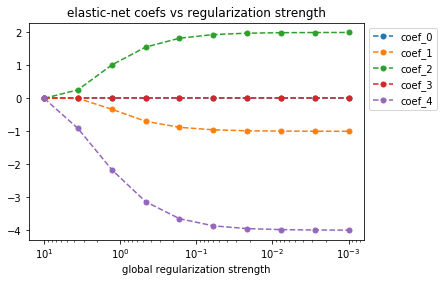

In [12]:
intercepts_coefs = models.plot_intercept_coefs()

In [13]:
display(intercepts_coefs)

,coef_0,coef_1,coef_2,coef_3,coef_4,intercept
reg_lambda,,,,,,
10.000000,0.0,0.000000,0.000000,0.0,0.000000,-1.0
3.593814,0.0,0.000000,0.258760,0.0,-0.914577,-1.0
1.291550,0.0,-0.331076,1.012696,0.0,-2.165493,-1.0
0.464159,0.0,-0.695601,1.554108,0.0,-3.135197,-1.0
0.166810,0.0,-0.879188,1.823865,0.0,-3.649721,-1.0
0.059948,0.0,-0.954904,1.934396,0.0,-3.868070,-1.0
0.021544,0.0,-0.983566,1.976113,0.0,-3.951753,-1.0
0.007743,0.0,-0.994064,1.991375,0.0,-3.982550,-1.0
0.002783,0.0,-0.997863,1.996895,0.0,-3.993715,-1.0
